Task 1 : Import Modules

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
data_SP = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv',encoding='ISO-8859-1')








TASK 2

Task 2.a

In [208]:

# Display the first few rows of the dataset
data_SP.head()


,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,H1.9.1.T Yes,H1.9.2.51 Chamber of Commerce,H1.9.2.52 Business Improvement Area (BIA),H1.9.2.95 Other Business and Economic Sector Partnerships,H1.9.3 Please provide highlights or examples of your librarys partnerships with the business and economic sector:,P1.1 Resident Population Served,P1.2 Contracting Population Served,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,Public or Union Library,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,...,0,0,0,0,0,"1,712",0,0,"2,762",0
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,Contracting Municipality,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,...,0,0,0,0,0,"10,975",0,0,"4,103",0
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Public or Union Library,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,...,0,0,0,0,0,"2,935",0,0,"1,408",0
3,Ajax,L0032,2022,Southern Ontario Library Service,Public or Union Library,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,...,1,0,0,2,0,"127,400",0,0,"38,400",0
4,Alberton Twp,L1098,2022,Ontario Library Service - North,Contracting Municipality,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,...,0,0,0,0,0,969,0,0,373,0


Task 2.b

In [209]:

# Print the summary statistics 
print("Summary Statistics:")
print(data_SP.describe())




Summary Statistics:
       Survey Year From  C0.4.F  French Special Collections - Original Format  \
count             364.0                                         364.000000      
mean             2022.0                                           5.711538      
std                 0.0                                          59.319063      
min              2022.0                                           0.000000      
25%              2022.0                                           0.000000      
50%              2022.0                                           0.000000      
75%              2022.0                                           0.000000      
max              2022.0                                         852.000000      

       C3.1.F  French Print Periodical Titles Held  \
count                                   364.000000   
mean                                      3.384615   
std                                      17.041204   
min                               

In [210]:
#datatype
print("Information:\n")
data_SP.info()
data_types_SP = data_SP.dtypes
print("\nData Types:")
data_types_SP

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Columns: 329 entries, Library Full Name to Unnamed: 328
dtypes: float64(8), int64(150), object(171)
memory usage: 935.7+ KB

Data Types:


Library Full Name                                      object
Library Number                                         object
Survey Year From                                        int64
A1.3 Ontario Library Service (OLS) Region (English)    object
A1.4 Type of Library Service (English)                 object
                                                        ...  
P1.1  Resident Population Served                       object
P1.2  Contracting Population Served                    object
P2.1  Contracting Households Served                    object
P2.2  Resident Households Served                       object
Unnamed: 328                                            int64
Length: 329, dtype: object

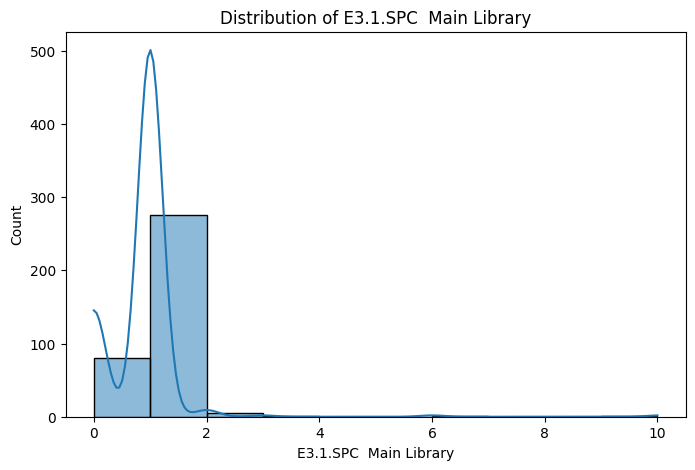

In [211]:
# visualization
col = 'E3.1.SPC  Main Library'
plt.figure(figsize=(8, 5))
sns.histplot(data_SP[col], kde=True)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()











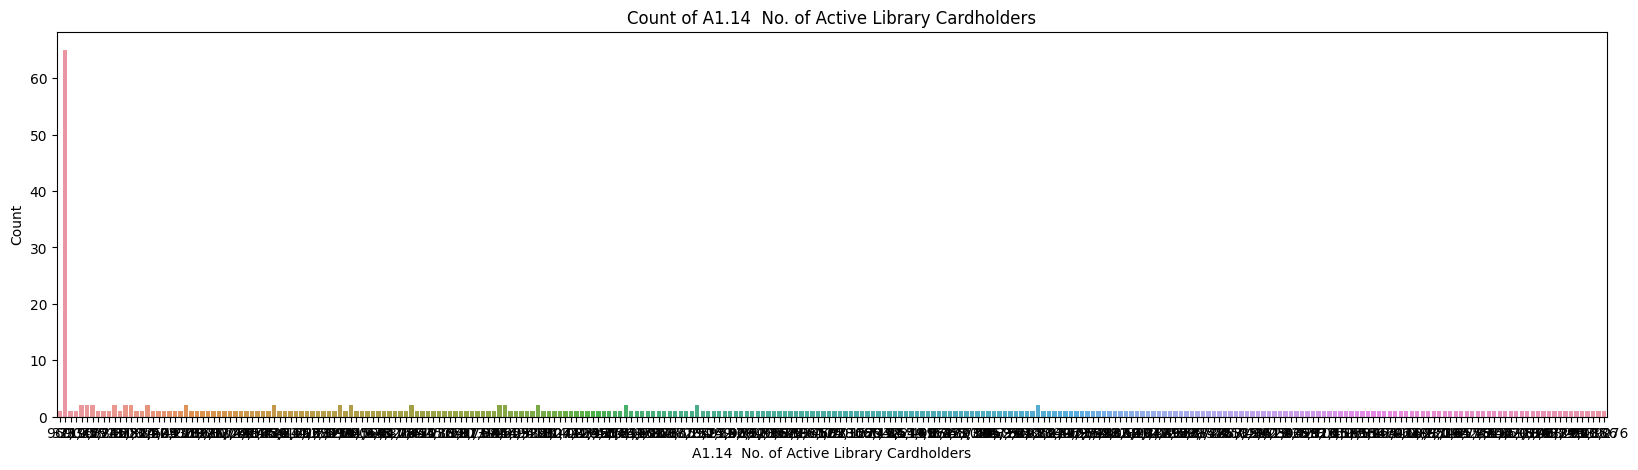

In [212]:
# Plotting categorical feature counts
col='A1.14  No. of Active Library Cardholders'
plt.figure(figsize=(20, 5))
sns.countplot(x=col, data=data_SP)
plt.title(f"Count of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


Task 3

In [213]:
# Check for missing values
missing_values = data_SP.isnull().sum()
print("Missing Values:")
print(missing_values)

#there is no missing values



Missing Values:
Library Full Name                                      0
Library Number                                         0
Survey Year From                                       0
A1.3 Ontario Library Service (OLS) Region (English)    0
A1.4 Type of Library Service (English)                 0
                                                      ..
P1.1  Resident Population Served                       0
P1.2  Contracting Population Served                    0
P2.1  Contracting Households Served                    0
P2.2  Resident Households Served                       0
Unnamed: 328                                           0
Length: 329, dtype: int64


In [214]:
#check for outliers

from scipy.stats import zscore

# Calculate the Z-score for numeric columns
z_scores = data_SP.select_dtypes(include=['int64', 'float64']).apply(zscore)

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 4

# Remove rows with outlier values for each numeric column
data_no_outliers = data_SP[(z_scores.abs() < outlier_threshold).all(axis=1)]

print(data_no_outliers)


Empty DataFrame
Columns: [Library Full Name, Library Number, Survey Year From, A1.3 Ontario Library Service (OLS) Region (English), A1.4 Type of Library Service (English), A1.5 Mailing Address, A1.9 Street Address, A1.10 City/Town, A1.11 Province, A1.12 Postal Code, A1.13 Web Site Address, A1.14  No. of Active Library Cardholders, B1.1  Net Balance brought forward from previous year, B2.1.1  Public Library Operating Grant (PLOG), B2.1.2  Pay Equity Grant, B2.1.3  First Nation Salary Supplement Grant, B2.1.4  Total Provincial Operating Funding, B2.2  Local Operating Funding (e.g. Municipality or Band local operating funding), B2.3  Contract Revenue (funds from other municipalities, neighbouring public library boards, Local Services Boards or First Nation Bands that contract for library services). Specify name of contracting organization and amount received from each., B2.4.1.03  Trillium Foundation funding, B2.4.1.04  Provincial student employment funding, B2.4.1.05  ServiceOntario, B2.

In [215]:
#feature engineering


# one-hot encoding for a categorical variable
data_SP = pd.get_dummies(data_SP, columns=['A1.4 Type of Library Service (English)'])

# log transformation on a skewed numeric feature
data_SP['log_transformed_column'] = np.log(data_SP['E3.3.SPC  Branches open less than 12 hours per week'] + 1)


Task 4.a

In [216]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Drop all non-numeric columns
data_numeric_SP = data_SP.select_dtypes(include='number')

# Split the data into training and testing sets
X = data_numeric_SP.drop(columns=['log_transformed_column'])
y = data_numeric_SP['log_transformed_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train,y_train)

# Model 1: Random Forest
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)
model1_predictions = model1.predict(X_test)

# Model 2: Support Vector Machine (SVM)
model2 = SVR()
model2.fit(X_train, y_train)
model2_predictions = model2.predict(X_test)




     Survey Year From  C0.4.F  French Special Collections - Original Format  \
210              2022                                                  0      
339              2022                                                  0      
299              2022                                                  0      
75               2022                                                  0      
84               2022                                                  0      
..                ...                                                ...      
71               2022                                                  0      
106              2022                                                  0      
270              2022                                                  0      
348              2022                                                 13      
102              2022                                                  0      

     C3.1.F  French Print Periodical Titles Held  \

Task 4.b

In [217]:
#Evaluate model performance

model1_mse = mean_squared_error(y_test, model1_predictions)
model1_r2 = r2_score(y_test, model1_predictions)
model2_mse = mean_squared_error(y_test, model2_predictions)
model2_r2 = r2_score(y_test, model2_predictions)
print("Model 1:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

print("\nModel 2:")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)

Model 1:
Mean Squared Error: 3.970484940370332e-05
R-squared: 0.9987047326025837

Model 2:
Mean Squared Error: 0.0333659447629878
R-squared: -0.08847712771980176


Task 5: Visualization

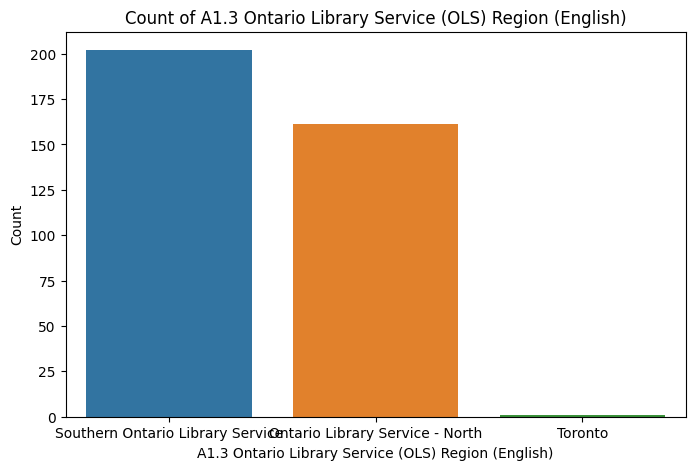

In [192]:
#countplot

col='A1.3 Ontario Library Service (OLS) Region (English)'
plt.figure(figsize=(8, 5))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


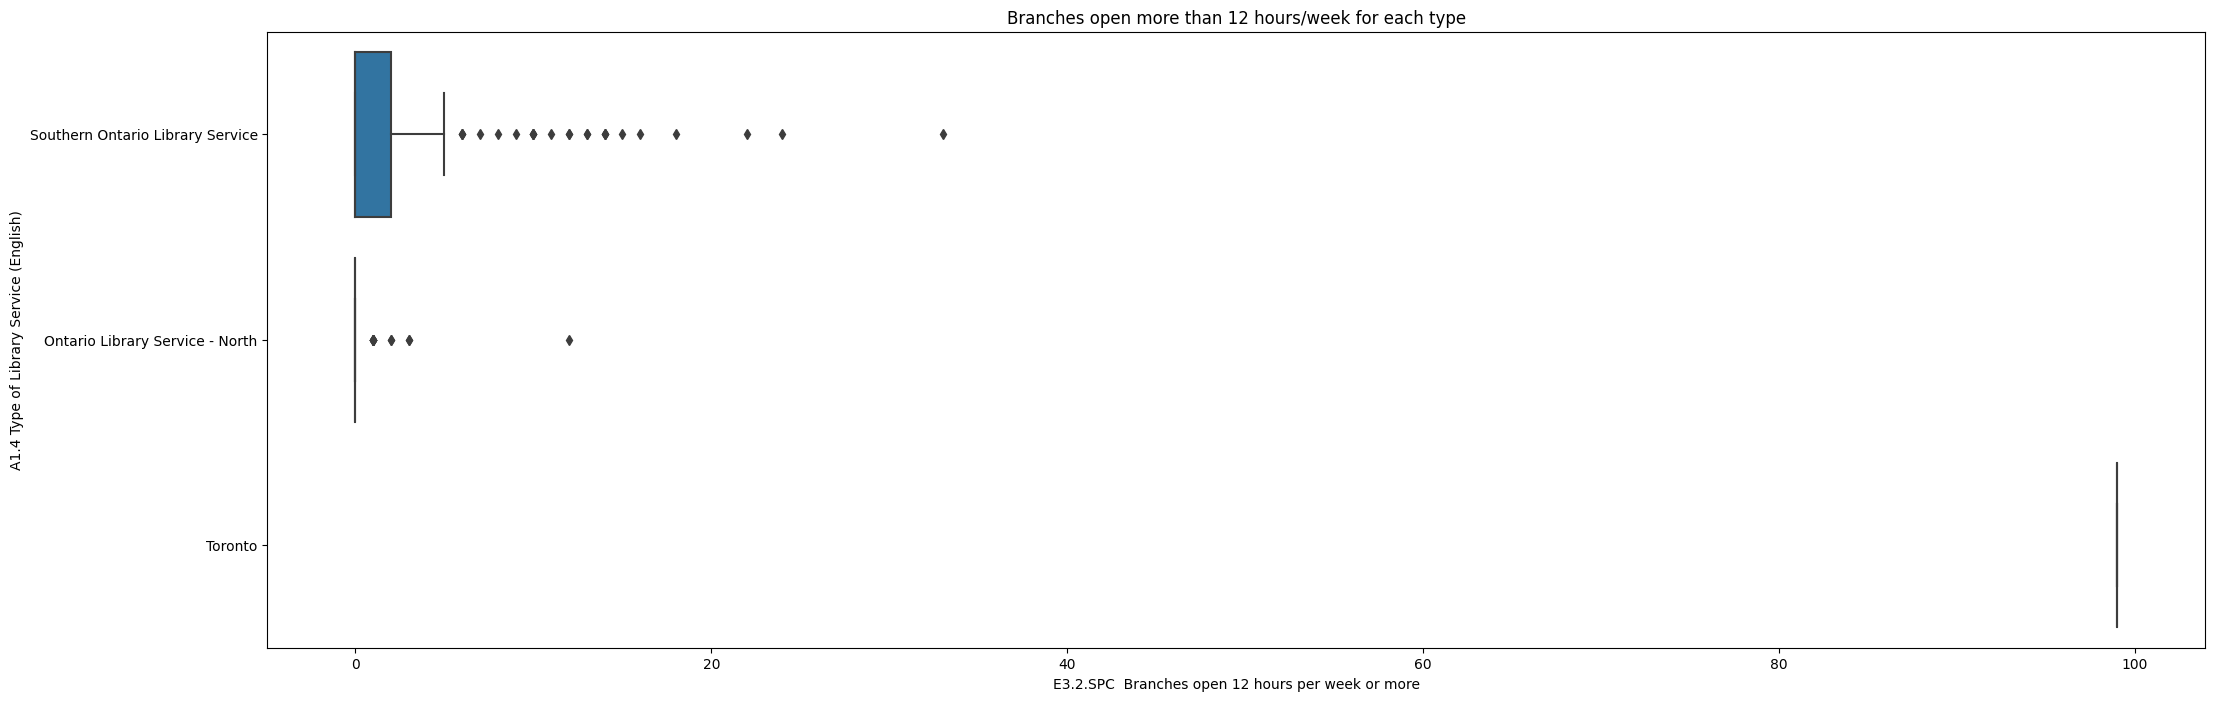

In [218]:
#boxplot

plt.figure(figsize=(25, 8))
sns.boxplot(x='E3.2.SPC  Branches open 12 hours per week or more', y='A1.3 Ontario Library Service (OLS) Region (English)', data=data)
plt.title('Branches open more than 12 hours/week for each type')
plt.xlabel('E3.2.SPC  Branches open 12 hours per week or more')
plt.ylabel('A1.4 Type of Library Service (English)')
plt.show()